- 평점 데이터 내의 사용자 정보를 기준으로 정보를 취합하고 현황을 파악한다.
- 사용자 별로 몇편의 영화에 평점을 부여했는지 분포를 파악하라(histogram)
- 사용자의 활동 패턴(활동 기간, 평점 주기 패턴)을 탐색하라(linear chart)
- 사용자의 선호 장르를 파악할 수 있게 시각화 하라(heatmap)

### 수행 방법
- 결측치를 파악후 제거 또는 채운다.
- x축: 사용자 id y축: 영화 평점 편수
- date column을 추가 후 가로축을 시간, 세로축을 평점으로 한 lienar chat를 그린다.
- bar chart, histogram, linear chart, heatmap을 그리는 방법을 파악하고 함수화 한다.

In [74]:
# module
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [75]:
# Util Functions
from enum import Enum

# 파일을 읽어와 pandas의 DataFrame으로 반환해줌
def get_df_from(path: str, sep: str = ','):
    extension = path.split('.')[-1]
    try:
        if extension == "csv" or extension == "txt":
            df = pd.read_csv(path, sep=sep, on_bad_lines='skip')
            if df.empty:
                print("W: DataFrame is empty.")
                return None
            return df
        else:
            print("E: File extension is not supported.")
            return None
    except FileNotFoundError:
        print(f"E: File not found. Check the path: {path}")
        return None
    except pd.errors.ParserError as e:
        print(f"E: Error parsing CSV file: {e}")
        return None
    except Exception as e:
        print(f"E: An unexpected error occured: {e}")
        return None

# 리스트의 평균을 반환.(기본값 0)
def calculate_mean(lst):
    if lst: # 빈 리스트가 아닌 경우에만 평균 계산
        return np.mean(lst)
    return 0 # 빈 리스트인 경우 NaN 반환

# 리스트의 합을 반환.(기본값 0)
def calculate_sum(lst):
    if lst:
        return np.sum(lst)
    return 0


class ChartShape(Enum):
    BAR = 1
    HISTOGRAM = 2
    LINEAR = 3
    HEATMAP = 4

# Chart 뽑는 함수
def get_chart_from(df: pd.DataFrame, x_col: str, y_col: str, shape: ChartShape = ChartShape.BAR, real_time: bool = False):
    plt.figure(figsize=(10, 6))
    if shape == ChartShape.BAR:
        plt.bar(df[x_col], df[y_col])
    elif shape == ChartShape.HISTOGRAM:
        plt.hist(df[x_col], bins=10)
    elif shape == ChartShape.LINEAR:
        plt.plot(df[x_col], df[y_col])
    else:
        plt.plot(df[x_col], df[y_col])

    if real_time:
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # 월 단위로 큰 눈금 표시
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # 날짜 형식 지정
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(df[x_col], rotation=45, ha='right')
    plt.show()


In [76]:
# Function

def get_df_strict_from(path: str, sep: str = ','):
    df = get_df_from(path, sep)
    for _ in range(3):
        if df is not None:
            return df
        new_path = input('오류가 발생했습니다. 정확한 경로를 확인해주세요: ')
        new_sep = input('구분자를 입력해주세요: ')
        df = get_df_from(new_path, new_sep)
    exit()

In [77]:
rates_path = './kmrd-small/rates.csv'
genres_path = './kmrd-small/genres.csv'

rates_df = get_df_strict_from(rates_path)
genres_df = get_df_strict_from(genres_path)

user
0      85
1       1
2      15
3      92
4      71
     ... 
95    216
96      2
97      2
98     54
99      1
Name: movie, Length: 100, dtype: int64


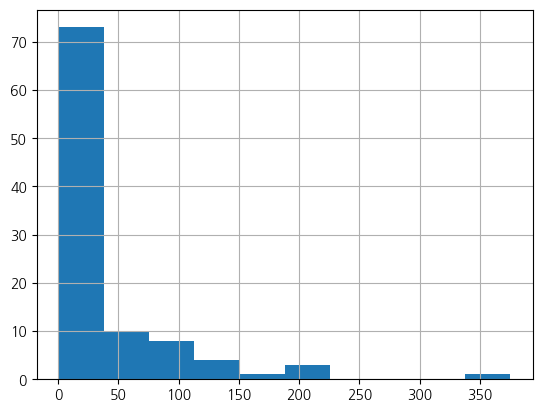

In [78]:
rates_user_df = rates_df.groupby('user').agg(len)['movie'][:100]
print(rates_user_df)
rates_user_df.hist(bins=10)
plt.show()
# get_chart_from(rates_user_df, 'movie', 'episodes', shape=ChartShape.HISTOGRAM)

In [79]:
import datetime

def get_user_pattern_chart(id: int):
    filtered_user = rates_df[rates_df['user'] == id]
    if not filtered_user.empty :
        filtered_user = filtered_user.sort_values(by='date')
        get_chart_from(filtered_user, 'date', 'rate', shape=ChartShape.LINEAR, real_time=True)
    else:
        print("E: Invalid user ID!")

rates_df['date'] = pd.to_datetime(rates_df['time'], unit='s')

In [80]:
merge_df = pd.merge(rates_df, genres_df, how='left')
sample1 = merge_df.pivot_table(index='user', columns='genre', values='rate')
sample1.fillna(0)
def get_user_genre_heatmap(s_val: int):
    e_val = s_val + 21
    data = sample1[s_val:e_val]

    plt.figure(figsize=(8, 6))  # 그래프 크기 설정 (선택적)
    plt.imshow(
        data, cmap="gist_heat", interpolation="nearest", aspect="auto"
    )  # 히트맵 그리기

    plt.colorbar(label="Value")  # 컬러바 추가
    plt.title("Heatmap using imshow()")

    plt.xticks(ticks=np.arange(len(data.columns)), labels=data.columns, rotation=90)
    plt.yticks(ticks=np.arange(s_val, e_val), labels=np.arange(s_val, e_val))

    plt.gca().set_facecolor('black')

    plt.tight_layout()
    plt.show()


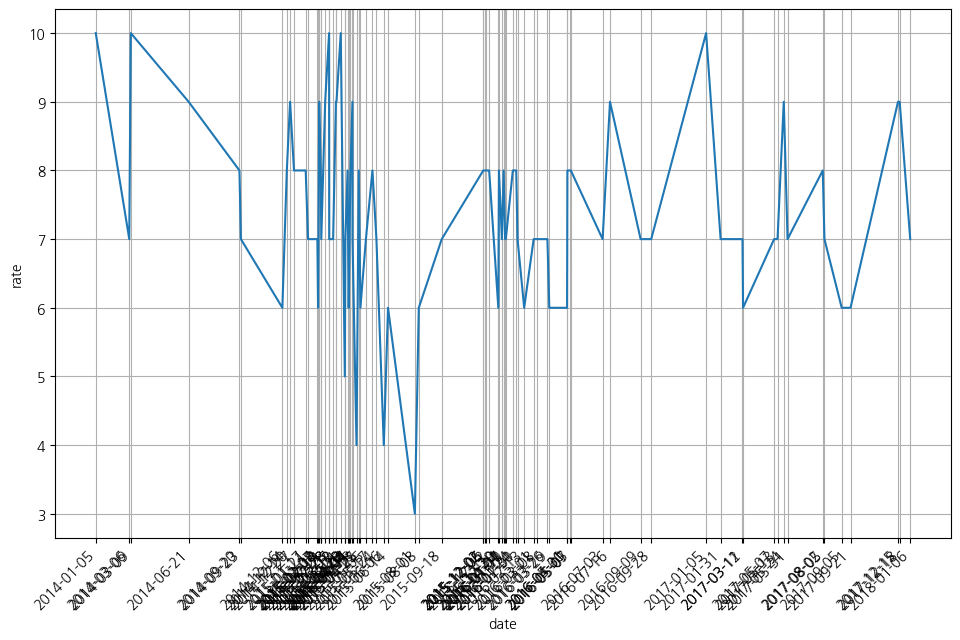

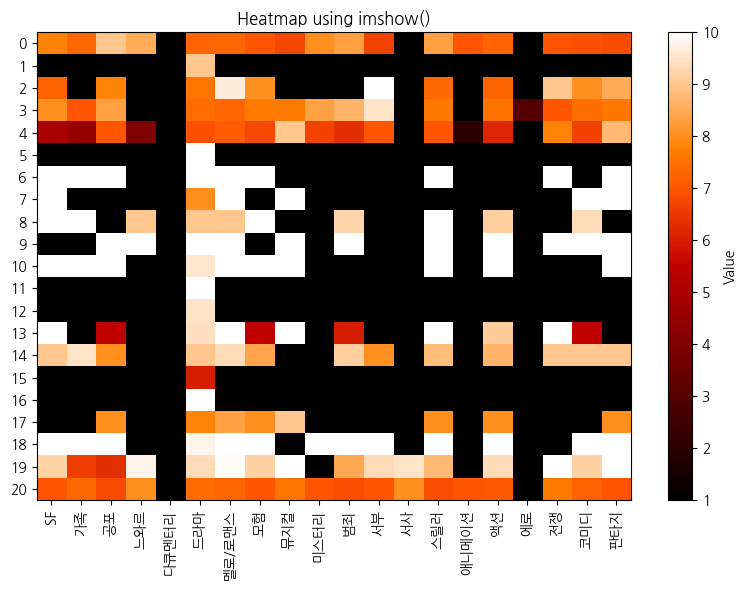

In [81]:

try:
    id = int(input("검색할 유저의 ID를 입력하세요:"))
    get_user_pattern_chart(id)
    get_user_genre_heatmap(id)
except:
    print(f"E: invalid integer")